In [2]:
import pandas as pd
df = pd.read_csv("09_groups.csv")

In [3]:
df.head()

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_group
0,2020-09-01 17:01:25,1283228,0.0,1538855,52,271,1.0,108.00,0,10004
1,2020-09-01 17:35:36,8873113,0.0,267307,52,271,1.0,108.00,0,10004
2,2020-09-01 19:19:21,12712899,0.0,610220,52,271,1.0,107.95,0,10004
3,2020-09-01 21:53:34,21535283,0.0,441497,52,271,1.0,108.00,0,10004
4,2020-09-01 18:42:31,642341,0.0,1065358,61,97,2.0,88.00,0,10091


In [4]:
bad_ids = pd.read_csv('bad_ids.csv')

In [5]:
bad_ids.head()

,Unnamed: 0,id_card
0,0,806096
1,1,1438102
2,2,72344
3,3,427981
4,4,1528414


### Remove Outliers from the data frame

In [9]:
df = df[~df['id_card'].isin(set(bad_ids['id_card']))]
df.head()

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_group
0,2020-09-01 17:01:25,1283228,0.0,1538855,52,271,1.0,108.00,0,10004
1,2020-09-01 17:35:36,8873113,0.0,267307,52,271,1.0,108.00,0,10004
2,2020-09-01 19:19:21,12712899,0.0,610220,52,271,1.0,107.95,0,10004
3,2020-09-01 21:53:34,21535283,0.0,441497,52,271,1.0,108.00,0,10004
4,2020-09-01 18:42:31,642341,0.0,1065358,61,97,2.0,88.00,0,10091


### Task1

Prove that buying discounted products depends on the average order sum. (It is more probable that the discounted product will be bought if a bunch of money is going to spend)

Lets say that H0 is the following: buying discounted products does not depend on the average order sum

In [12]:
green_amount = df.groupby("id_doc")['is_green'].sum()
green1_amount = list(green_amount.index[green_amount.to_numpy().nonzero()])
green0_amount = list(set(green_amount.index).difference(green1_amount))
print(green1_amount[:10])
print(green0_amount[:10])

[19, 60, 76, 138, 152, 159, 181, 197, 232, 234]
[16777216, 2, 4, 5, 16777221, 16777229, 16, 18, 16777235, 16777239]


In [13]:
from scipy.stats import ttest_ind
avg_sum = df.groupby('id_doc')['sum'].mean()
ttest_ind(avg_sum[green1_amount], avg_sum[green0_amount])

Ttest_indResult(statistic=-379.1254533395915, pvalue=0.0)

H0 is rejected. It means that there is some dependancy between discounted products and average order sum.

In [17]:
green1_checks = df[df['is_green'] == 1].groupby(by=['id_doc']).sum()['sum']
print(green1_checks.mean() / len(green1_checks))
green0_checks = df[df['is_green'] == 0].groupby(by=['id_doc']).sum()['sum']
print(green0_checks.mean() / len(green0_checks)) # normalize due to different length of green1 and green0

0.0001792059303139072
9.458886040865037e-05


In [27]:
ttest_ind(green1_checks, df[df['is_green'] == 0].sample(n=len(green1_checks)).groupby(by=['id_doc']).sum()['sum'])

Ttest_indResult(statistic=226.9082704172296, pvalue=0.0)

From here it is obvious that it is more probable that the discounted product will be bought if a bunch of money is going to spend

### Task2

Prove that the frequency of shopping grows around the wage taking days (1-6 days of each month, 20-26 days of each month)


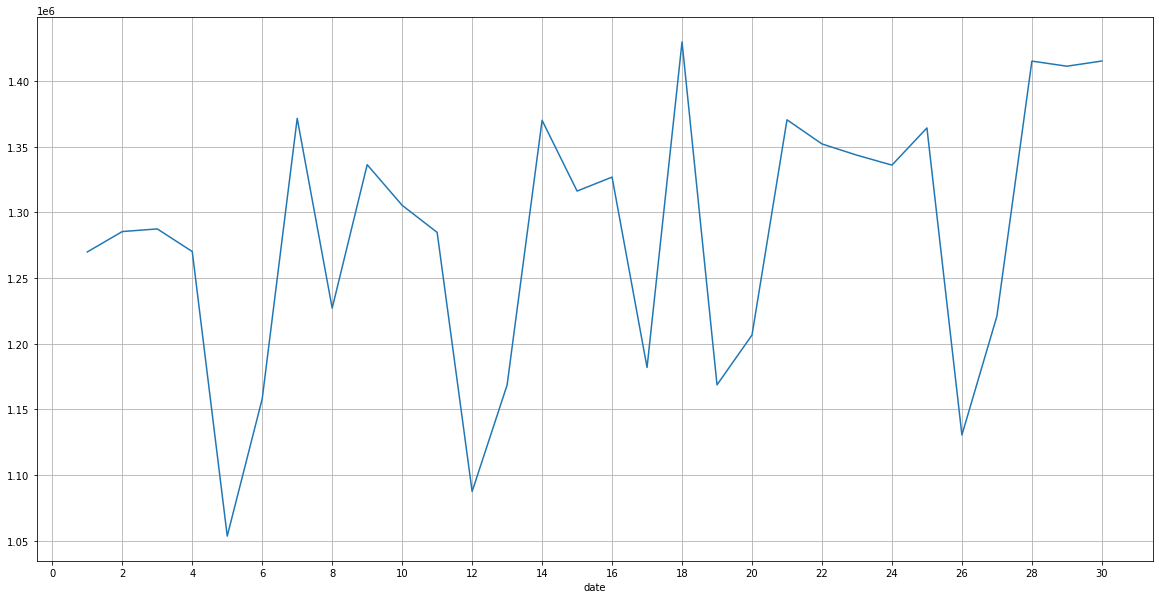

In [33]:
import matplotlib.pyplot as plt
df.index = pd.to_datetime(df['date'],format='%Y-%m-%d %H:%M:%S')
sums = df.groupby(by=[df.index.day])['id_doc'].count()
plt.figure(figsize=(20,10))
plt.locator_params(axis="x", nbins=31)
sums.plot()
plt.grid()

We see that from at 5th, 6th, 19th, 20th number of purchases at their local minimum, after that time frequency of shopping increases

### Task3

Define such cohort existence:
- Frequent buyers - The users that are shopping frequently(daily, weekly, monthly) 
- Average purchase sum - The customers that usually spend the same amount of money 
- Usual cart - The customers grouped by the product groups


<class 'pandas.io.formats.printing.PrettyDict'>


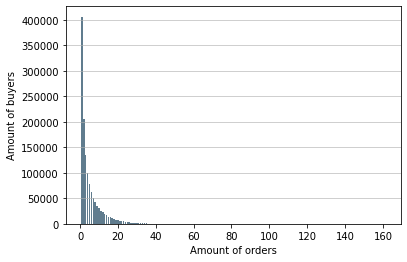

In [46]:
users = df.groupby(by=['id_card'])
amount_of_orders = users.agg({"id_doc": "nunique"})
amount_of_orders.head()
grouped_by_number_of_orders = amount_of_orders.groupby(by=['id_doc'])

x = []
y = []
print(type(grouped_by_number_of_orders.groups))
for key, value in grouped_by_number_of_orders.groups.items():
    x.append(key)
    y.append(len(value))

plt.bar(x, y, color='#607c8e')
plt.xlabel('Amount of orders')
plt.ylabel('Amount of buyers')
plt.grid(axis='y', alpha=0.75)
plt.show()
